# Problem Satement:- 
### With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the training data
X = np.array([[1, 1], [2, 1], [2, 2], [1, 3], [4, 5], [5, 5], [5, 6], [4, 7]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [3]:
# Initialize the weights and bias
w = np.random.rand(2)
b = np.random.rand(1)

In [4]:
# Define the perceptron learning algorithm
def perceptron_learning(X, y, w, b, learning_rate, num_epochs):
    errors = []
    for epoch in range(num_epochs):
        error = 0
        for xi, target in zip(X, y):
            # Compute the activation
            activation = np.dot(xi, w) + b

            # Apply the activation function (step function)
            if activation >= 0:
                prediction = 1
            else:
                prediction = 0

            # Update the weights and bias
            update = learning_rate * (target - prediction)
            w += update * xi
            b += update

            # Accumulate the error
            error += int(update != 0)

        errors.append(error)
        if error == 0:
            break

    return w, b, errors


In [5]:
# Run the perceptron learning algorithm
learning_rate = 0.1
num_epochs = 100
w, b, errors = perceptron_learning(X, y, w, b, learning_rate, num_epochs)

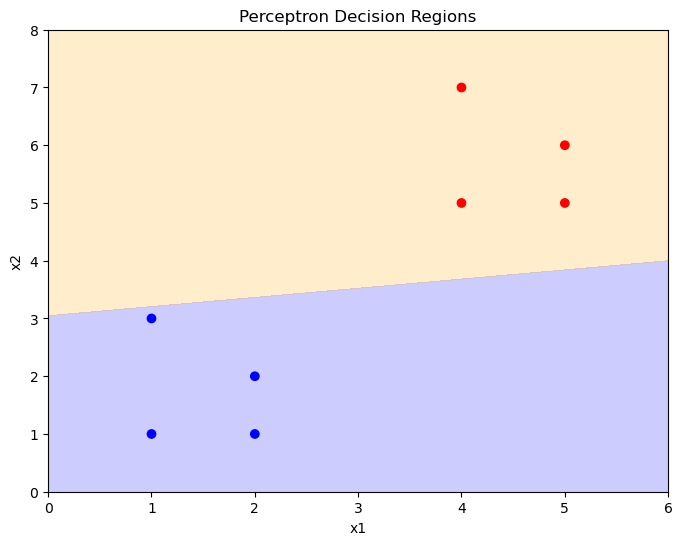

In [6]:
# Visualize the decision regions
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(len(x1)):
    for j in range(len(x2)):
        xi = np.array([x1[i], x2[j]])
        Z[j, i] = np.dot(xi, w) + b

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=1, colors=('blue', 'orange'), alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Regions')
plt.xlim(0, 6)
plt.ylim(0, 8)
plt.show()